In [1]:
#pip install TextBlob

In [2]:
import json
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
from sqlalchemy import create_engine
from sqlalchemy.orm import scoped_session, sessionmaker
import psycopg2
import pyodbc


In [3]:
# Database related all the code is moved to this file
%run -i "SqlConn.py"
#importing local py file
import SqlConn 

In [4]:
#Fetch Tweets and Sentiment data - Join from Tweet and Sentiment tables
try:
    df_dbSentimentData = SqlConn.fetchTweetFinance()
    print("Data transfer Done")
except BaseException as err:
    print(err)


Data transfer Done


In [5]:
df_dbSentimentData[(df_dbSentimentData['tweetID'] == 1531497809421139973)]

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
1474,1531497809421139973,tesla,2022-05-30,True. Tesla was attacked by Romney in 2 of 3 p...,NaN,4722,484,NaN,NaN


In [6]:
df_dbSentimentData

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
0,153099684280410112,tesla,2011-12-31,Hacked my Tesla charge connector on a small is...,55.0,405,32,NaN,NaN
1,156927468836630528,tesla,2012-01-10,The exec conf room at Tesla used to be called ...,32.0,315,67,5.524000,3359000.0
2,157700726515183616,tesla,2012-01-12,"A Tesla Roadster just passed the 100,000 mile ...",5.0,15,51,5.650000,3646500.0
3,159330976378519552,tesla,2012-01-17,Will communicate better in the future. Too man...,44.0,163,43,5.320000,23258000.0
4,159396536621596672,tesla,2012-01-17,That's not just paranoia (a healthy trait at t...,23.0,16,14,5.320000,23258000.0
...,...,...,...,...,...,...,...,...,...
1504,1549423649463181312,tesla,2022-07-19,To think that Fremont was just a derelict buil...,NaN,38909,2470,736.590027,26963400.0
1505,1549440612021243906,tesla,2022-07-19,Teslas are the most made-in-USA vehicles,NaN,46082,2945,736.590027,26963400.0
1506,1550816088300179459,tesla,2022-07-23,Excited to work with Tesla Service to enable s...,NaN,109148,7437,NaN,NaN
1507,1551392795545333760,tesla,2022-07-24,WSJ has run so many bs hit pieces on me and Te...,NaN,26821,2907,NaN,NaN


In [7]:
# Read the csv files containin the tweets by Eon Musk from 2010 to 2022 for DogeCOin, Tesla, spaceX, twitter.
#df_doge = pd.read_csv('../Data_Resources/scrapped_data/doge_tweets.csv')
#df_spaceX = pd.read_csv('../Data_Resources/scrapped_data/spaceX_tweets.csv')
#df_tesla = pd.read_csv('../Data_Resources/scrapped_data/tesla_tweets.csv')
#df_twitter = pd.read_csv('../Data_Resources/scrapped_data/twitter_tweets.csv')

In [8]:
df_doge = df_dbSentimentData.loc[df_dbSentimentData.financeType == 'doge']
df_tesla = df_dbSentimentData.loc[df_dbSentimentData.financeType == 'tesla']
df_twitter = df_dbSentimentData.loc[df_dbSentimentData.financeType == 'twitter']

In [9]:
df_doge

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
646,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.002795,6.029836e+07
647,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.002795,6.029836e+07
648,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959,0.002795,6.029836e+07
892,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192,207,0.002142,2.298104e+08
953,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930,775,0.003061,7.470537e+07
...,...,...,...,...,...,...,...,...,...
1461,1530209049261658112,doge,2022-05-27,"Tesla merch can be bought with Doge, soon Spac...",NaN,203072,19452,0.081335,1.310058e+09
1477,1531696049064116225,doge,2022-05-31,And Palmer always forgets to mention that he n...,NaN,3650,310,0.085865,6.724446e+08
1478,1531699416490557440,doge,2022-05-31,You’re humble bro. Billy’s sense of humor &amp...,NaN,12148,1228,0.085865,6.724446e+08
1492,1538406040374595585,doge,2022-06-19,I will keep supporting Dogecoin,NaN,396094,37257,0.060396,1.166164e+09


In [10]:
print(f"shape of doge df: " + str(df_doge.shape))
print(f"shape of tesla df: " + str(df_tesla.shape))
print(f"shape of twitter df: " + str(df_twitter.shape))

shape of doge df: (75, 9)
shape of tesla df: (1303, 9)
shape of twitter df: (131, 9)


In [11]:
df_doge.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
646,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.002795,60298362.0
647,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.002795,60298362.0
648,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959,0.002795,60298362.0
892,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192,207,0.002142,229810398.0
953,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930,775,0.003061,74705371.0


In [12]:
df_tesla.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
0,153099684280410112,tesla,2011-12-31,Hacked my Tesla charge connector on a small is...,55.0,405,32,NaN,NaN
1,156927468836630528,tesla,2012-01-10,The exec conf room at Tesla used to be called ...,32.0,315,67,5.524,3359000.0
2,157700726515183616,tesla,2012-01-12,"A Tesla Roadster just passed the 100,000 mile ...",5.0,15,51,5.650,3646500.0
3,159330976378519552,tesla,2012-01-17,Will communicate better in the future. Too man...,44.0,163,43,5.320,23258000.0
4,159396536621596672,tesla,2012-01-17,That's not just paranoia (a healthy trait at t...,23.0,16,14,5.320,23258000.0


In [13]:
df_twitter.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
142,601669073441697792,twitter,2015-05-22,What are the best riddles you've heard that ar...,638.0,599,208,36.599998,9861800.0
168,716780425939521538,twitter,2016-04-03,Signing off from impromptu Twitter AMA. Thanks...,241.0,3252,367,NaN,NaN
183,750354728169644032,twitter,2016-07-05,Exactly! I love Twitter.,13.0,328,41,17.139999,15718000.0
216,783347230245736448,twitter,2016-10-04,I use twitter for news orgs. My Insta has same...,312.0,5254,1598,23.520000,22230700.0
217,783842202220802048,twitter,2016-10-05,"Yeah, and several others at various times. My ...",20.0,225,16,24.870001,63716800.0


# Vader Sentiment Analyzer

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tamie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
vader = SentimentIntensityAnalyzer()

In [16]:
df_doge_vader = df_doge.copy()
df_tesla_vader = df_tesla.copy()
df_twitter_vader = df_twitter.copy()

In [17]:
# df_doge_vader["normalized"] = df_doge_vader["Tweet"].apply(lambda tweet:unicodedata.normalize('NFKD', tweet))
df_doge_vader["compound_sc"] = df_doge_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["compound"])
df_doge_vader["negative_sc"] = df_doge_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neg"])
df_doge_vader["neutral_sc"] = df_doge_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neu"])
df_doge_vader["positive_sc"] = df_doge_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["pos"])
df_doge_vader.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,compound_sc,negative_sc,neutral_sc,positive_sc
646,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.002795,60298362.0,0.8176,0.0,0.414,0.586
647,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.002795,60298362.0,0.0000,0.0,1.000,0.000
648,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959,0.002795,60298362.0,0.3400,0.0,0.556,0.444
892,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192,207,0.002142,229810398.0,0.0000,0.0,1.000,0.000
953,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930,775,0.003061,74705371.0,0.1511,0.0,0.715,0.285


In [18]:
# df_doge_vader["normalized"] = df_doge_vader["Tweet"].apply(lambda tweet:unicodedata.normalize('NFKD', tweet))
df_tesla_vader["compound_sc"] = df_tesla_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["compound"])
df_tesla_vader["negative_sc"] = df_tesla_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neg"])
df_tesla_vader["neutral_sc"] = df_tesla_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neu"])
df_tesla_vader["positive_sc"] = df_tesla_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["pos"])
df_tesla_vader.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,compound_sc,negative_sc,neutral_sc,positive_sc
0,153099684280410112,tesla,2011-12-31,Hacked my Tesla charge connector on a small is...,55.0,405,32,NaN,NaN,-0.4019,0.172,0.828,0.000
1,156927468836630528,tesla,2012-01-10,The exec conf room at Tesla used to be called ...,32.0,315,67,5.524,3359000.0,0.6616,0.000,0.826,0.174
2,157700726515183616,tesla,2012-01-12,"A Tesla Roadster just passed the 100,000 mile ...",5.0,15,51,5.650,3646500.0,0.0000,0.000,1.000,0.000
3,159330976378519552,tesla,2012-01-17,Will communicate better in the future. Too man...,44.0,163,43,5.320,23258000.0,-0.0772,0.122,0.732,0.146
4,159396536621596672,tesla,2012-01-17,That's not just paranoia (a healthy trait at t...,23.0,16,14,5.320,23258000.0,0.0875,0.138,0.665,0.197


In [19]:
# df_doge_vader["normalized"] = df_doge_vader["Tweet"].apply(lambda tweet:unicodedata.normalize('NFKD', tweet))
df_twitter_vader["compound_sc"] = df_twitter_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["compound"])
df_twitter_vader["negative_sc"] = df_twitter_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neg"])
df_twitter_vader["neutral_sc"] = df_twitter_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neu"])
df_twitter_vader["positive_sc"] = df_twitter_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["pos"])
df_twitter_vader.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,compound_sc,negative_sc,neutral_sc,positive_sc
142,601669073441697792,twitter,2015-05-22,What are the best riddles you've heard that ar...,638.0,599,208,36.599998,9861800.0,0.6369,0.0,0.741,0.259
168,716780425939521538,twitter,2016-04-03,Signing off from impromptu Twitter AMA. Thanks...,241.0,3252,367,NaN,NaN,0.4404,0.0,0.854,0.146
183,750354728169644032,twitter,2016-07-05,Exactly! I love Twitter.,13.0,328,41,17.139999,15718000.0,0.6696,0.0,0.308,0.692
216,783347230245736448,twitter,2016-10-04,I use twitter for news orgs. My Insta has same...,312.0,5254,1598,23.520000,22230700.0,0.0000,0.0,1.000,0.000
217,783842202220802048,twitter,2016-10-05,"Yeah, and several others at various times. My ...",20.0,225,16,24.870001,63716800.0,0.2960,0.0,0.891,0.109


### Sentiment Analysis by TextBlob

In [20]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [21]:
#Make a copy of the df_doge df
df_doge_txtblb = df_doge.copy()

# Create 2 new columns
df_doge_txtblb["subjectivity"] = df_doge_txtblb["fullText"].apply(getSubjectivity)
df_doge_txtblb["polarity"] = df_doge_txtblb["fullText"].apply(getPolarity)
df_doge_txtblb['Sentiment'] = df_doge_txtblb['polarity'].apply(getAnalysis)
df_doge_txtblb.head()
df_doge_txtblb.to_csv("filename.csv")

In [22]:
df_doge_txtblb["Sentiment"].value_counts()

Neutral     47
Positive    22
Negative     6
Name: Sentiment, dtype: int64

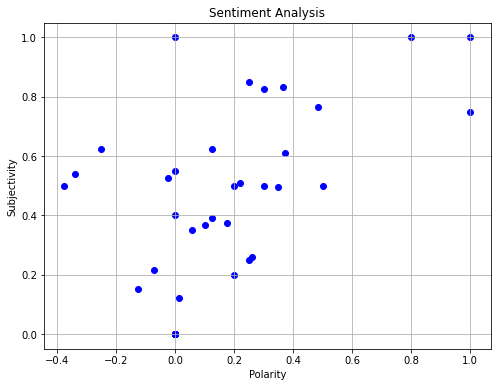

In [23]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
plt.scatter(df_doge_txtblb["polarity"],df_doge_txtblb["subjectivity"], color = 'Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid()
plt.show()

In [24]:
#Make a copy of the df_tesla df
df_tesla_txtblb = df_tesla.copy()

# Create 2 new columns
df_tesla_txtblb["subjectivity"] = df_tesla_txtblb["fullText"].apply(getSubjectivity)
df_tesla_txtblb["polarity"] = df_tesla_txtblb["fullText"].apply(getPolarity)
df_tesla_txtblb['Sentiment'] = df_tesla_txtblb['polarity'].apply(getAnalysis)
df_tesla_txtblb.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,subjectivity,polarity,Sentiment
0,153099684280410112,tesla,2011-12-31,Hacked my Tesla charge connector on a small is...,55.0,405,32,NaN,NaN,0.233333,-0.125,Negative
1,156927468836630528,tesla,2012-01-10,The exec conf room at Tesla used to be called ...,32.0,315,67,5.524,3359000.0,0.650000,0.350,Positive
2,157700726515183616,tesla,2012-01-12,"A Tesla Roadster just passed the 100,000 mile ...",5.0,15,51,5.650,3646500.0,0.333333,0.250,Positive
3,159330976378519552,tesla,2012-01-17,Will communicate better in the future. Too man...,44.0,163,43,5.320,23258000.0,0.435000,0.150,Positive
4,159396536621596672,tesla,2012-01-17,That's not just paranoia (a healthy trait at t...,23.0,16,14,5.320,23258000.0,0.500000,0.175,Positive


In [25]:
df_tesla_txtblb["Sentiment"].value_counts()

Positive    770
Neutral     329
Negative    204
Name: Sentiment, dtype: int64

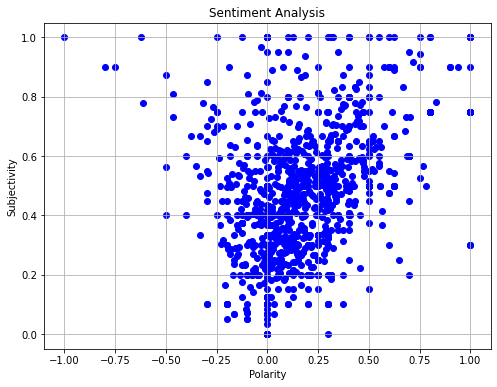

In [26]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
plt.scatter(df_tesla_txtblb["polarity"],df_tesla_txtblb["subjectivity"], color = 'Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid()
plt.show()

In [27]:
#Make a copy of the df_twitter df
df_twitter_txtblb = df_twitter.copy()

# Create 2 new columns
df_twitter_txtblb["subjectivity"] = df_twitter_txtblb["fullText"].apply(getSubjectivity)
df_twitter_txtblb["polarity"] = df_twitter_txtblb["fullText"].apply(getPolarity)
df_twitter_txtblb['Sentiment'] = df_twitter_txtblb['polarity'].apply(getAnalysis)
df_twitter_txtblb.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,subjectivity,polarity,Sentiment
142,601669073441697792,twitter,2015-05-22,What are the best riddles you've heard that ar...,638.0,599,208,36.599998,9861800.0,0.366667,0.333333,Positive
168,716780425939521538,twitter,2016-04-03,Signing off from impromptu Twitter AMA. Thanks...,241.0,3252,367,NaN,NaN,0.266667,0.191667,Positive
183,750354728169644032,twitter,2016-07-05,Exactly! I love Twitter.,13.0,328,41,17.139999,15718000.0,0.600000,0.500000,Positive
216,783347230245736448,twitter,2016-10-04,I use twitter for news orgs. My Insta has same...,312.0,5254,1598,23.520000,22230700.0,0.125000,0.000000,Neutral
217,783842202220802048,twitter,2016-10-05,"Yeah, and several others at various times. My ...",20.0,225,16,24.870001,63716800.0,0.262963,-0.051852,Negative


In [28]:
df_twitter_txtblb["Sentiment"].value_counts()

Positive    73
Neutral     38
Negative    20
Name: Sentiment, dtype: int64

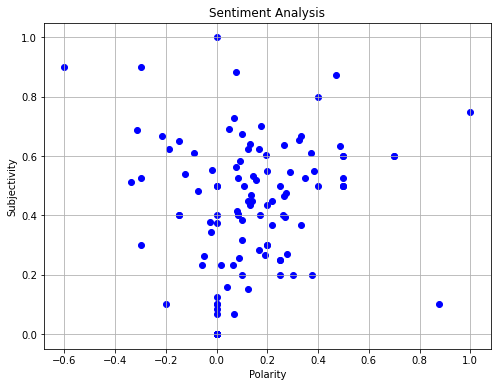

In [29]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
plt.scatter(df_twitter_txtblb["polarity"],df_twitter_txtblb["subjectivity"], color = 'Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid()
plt.show()

In [30]:
df_dbSentimentData_Combine = pd.concat([df_doge_vader,df_tesla_vader,df_twitter_vader],ignore_index=False)
df_dbSentimentData_Combine.rename(columns = {'Sentiment':'sentiment','compound_sc':'sentimentScore'} ,inplace=True)

In [31]:
df_dbSentimentData_Combine

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,sentimentScore,negative_sc,neutral_sc,positive_sc
646,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.002795,60298362.0,0.8176,0.000,0.414,0.586
647,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.002795,60298362.0,0.0000,0.000,1.000,0.000
648,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959,0.002795,60298362.0,0.3400,0.000,0.556,0.444
892,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192,207,0.002142,229810398.0,0.0000,0.000,1.000,0.000
953,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930,775,0.003061,74705371.0,0.1511,0.000,0.715,0.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,1531640532350513155,twitter,2022-05-31,"Maybe if they do the opposite, Twitter will be...",NaN,3284,229,39.599998,11579000.0,0.4404,0.000,0.828,0.172
1486,1534938078279880706,twitter,2022-06-09,Only Twitter,NaN,57122,2420,39.529999,7970300.0,0.0000,0.000,1.000,0.000
1491,1538208757905297409,twitter,2022-06-18,To answer the question: Why Twitter?,NaN,47711,2818,NaN,NaN,0.0000,0.000,1.000,0.000
1493,1539292625433501702,twitter,2022-06-21,Twitter me &amp; real-life me are quite differ...,NaN,147001,8630,38.910000,16902200.0,0.5530,0.000,0.691,0.309


In [32]:
df_sentiment_tostore = df_dbSentimentData_Combine[["tweetID","date","adjustedClose","volume","sentimentScore"]]

In [33]:
#Insert Sentiment data
try:
    SqlConn.insertSentiment(df_sentiment_tostore)
    print("Data transfer Done")
except BaseException as err:
    print(err)


Data transfer Done


In [34]:
df_dbSentimentData_Combine

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,sentimentScore,negative_sc,neutral_sc,positive_sc
646,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.002795,60298362.0,0.8176,0.000,0.414,0.586
647,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.002795,60298362.0,0.0000,0.000,1.000,0.000
648,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959,0.002795,60298362.0,0.3400,0.000,0.556,0.444
892,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192,207,0.002142,229810398.0,0.0000,0.000,1.000,0.000
953,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930,775,0.003061,74705371.0,0.1511,0.000,0.715,0.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,1531640532350513155,twitter,2022-05-31,"Maybe if they do the opposite, Twitter will be...",NaN,3284,229,39.599998,11579000.0,0.4404,0.000,0.828,0.172
1486,1534938078279880706,twitter,2022-06-09,Only Twitter,NaN,57122,2420,39.529999,7970300.0,0.0000,0.000,1.000,0.000
1491,1538208757905297409,twitter,2022-06-18,To answer the question: Why Twitter?,NaN,47711,2818,NaN,NaN,0.0000,0.000,1.000,0.000
1493,1539292625433501702,twitter,2022-06-21,Twitter me &amp; real-life me are quite differ...,NaN,147001,8630,38.910000,16902200.0,0.5530,0.000,0.691,0.309
